In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

In [4]:
df = pd.read_csv('cleaned_data.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EmployeeCount                      1470 non-null   int64
 6   EmployeeNumber                     1470 non-null   int64
 7   EnvironmentSatisfaction            1470 non-null   int64
 8   Gender                             1470 non-null   int64
 9   HourlyRate                         1470 non-null   int64
 10  JobInvolvement                     1470 non-null   int64
 11  JobLevel                           1470 non-null   int64
 12  JobSatisfaction     

In [7]:
X = df.drop('Attrition' , axis = 1 , inplace = False)
y = df['Attrition']

X_train , X_test , y_train , y_test = train_test_split(X,y , random_state = 42 , test_size = 0.2 , stratify = y) 

In [8]:
print("X_train shape:", X_train.shape)
print("X_test  shape:", X_test.shape)
print("y_train counts:\n", y_train.value_counts())
print("y_test  counts:\n", y_test.value_counts())

X_train shape: (1176, 52)
X_test  shape: (294, 52)
y_train counts:
 Attrition
1    986
0    190
Name: count, dtype: int64
y_test  counts:
 Attrition
1    247
0     47
Name: count, dtype: int64


In [9]:
model = LogisticRegression(class_weight = 'balanced' , max_iter = 1000 , random_state = 42)
model.fit(X_train , y_train)

C:\Users\satyp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [10]:
y_pred = model.predict(X_test)
model_accuracy = accuracy_score(y_test , y_pred)
print('Acurracy =' , model_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Acurracy = 0.6496598639455783
Confusion Matrix:
 [[ 26  21]
 [ 82 165]]


In [13]:
xgb = XGBClassifier()
xgb.fit(X_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [14]:
y_pred = xgb.predict(X_test)
model_accuracy = accuracy_score(y_test , y_pred)
print('Acurracy =' , model_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Acurracy = 0.8503401360544217
Confusion Matrix:
 [[ 15  32]
 [ 12 235]]


In [16]:
df['Attrition'] = df['Attrition'].map({0 : 1 , 1 : 0})

In [17]:
neg,pos = (y_train == 0).sum() , (y_train == 1).sum() 
scale = neg/pos

In [18]:
xgb = XGBClassifier(
    scale_pos_weight = scale,
    use_label_encoder = False , 
    eval_metric = 'logloss'
)
xgb.fit(X_train , y_train)

C:\Users\satyp\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:00:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [19]:
y_pred = xgb.predict(X_test)
model_accuracy = accuracy_score(y_test , y_pred)
print('Acurracy =' , model_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Acurracy = 0.8299319727891157
Confusion Matrix:
 [[ 17  30]
 [ 20 227]]


In [22]:
cat = CatBoostClassifier()
cat.fit(X_train , y_train)

Learning rate set to 0.011041
0:	learn: 0.6848517	total: 151ms	remaining: 2m 31s
1:	learn: 0.6759758	total: 156ms	remaining: 1m 18s
2:	learn: 0.6681376	total: 161ms	remaining: 53.4s
3:	learn: 0.6599194	total: 164ms	remaining: 40.9s
4:	learn: 0.6531228	total: 169ms	remaining: 33.6s
5:	learn: 0.6458152	total: 173ms	remaining: 28.6s
6:	learn: 0.6390934	total: 176ms	remaining: 25s
7:	learn: 0.6322011	total: 181ms	remaining: 22.4s
8:	learn: 0.6257079	total: 184ms	remaining: 20.3s
9:	learn: 0.6198409	total: 189ms	remaining: 18.7s
10:	learn: 0.6138690	total: 193ms	remaining: 17.3s
11:	learn: 0.6074667	total: 197ms	remaining: 16.2s
12:	learn: 0.6013044	total: 201ms	remaining: 15.2s
13:	learn: 0.5951938	total: 204ms	remaining: 14.4s
14:	learn: 0.5894758	total: 208ms	remaining: 13.7s
15:	learn: 0.5834606	total: 214ms	remaining: 13.2s
16:	learn: 0.5776405	total: 217ms	remaining: 12.6s
17:	learn: 0.5727760	total: 220ms	remaining: 12s
18:	learn: 0.5662645	total: 224ms	remaining: 11.6s
19:	learn: 0.

In [23]:
y_pred = cat.predict(X_test)
model_accuracy = accuracy_score(y_test , y_pred)
print('Acurracy =' , model_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Acurracy = 0.8571428571428571
Confusion Matrix:
 [[ 10  37]
 [  5 242]]


In [24]:
cat = CatBoostClassifier(
    scale_pos_weight = scale,
    eval_metric = 'Logloss'
)
cat.fit(X_train , y_train)

Learning rate set to 0.011041
0:	learn: 0.6876856	total: 4.84ms	remaining: 4.83s
1:	learn: 0.6829542	total: 8.33ms	remaining: 4.16s
2:	learn: 0.6776353	total: 13.2ms	remaining: 4.39s
3:	learn: 0.6722869	total: 18ms	remaining: 4.49s
4:	learn: 0.6671465	total: 21.5ms	remaining: 4.29s
5:	learn: 0.6626779	total: 25.5ms	remaining: 4.22s
6:	learn: 0.6578534	total: 29.5ms	remaining: 4.18s
7:	learn: 0.6531974	total: 33.4ms	remaining: 4.14s
8:	learn: 0.6489186	total: 38.8ms	remaining: 4.27s
9:	learn: 0.6447997	total: 43.2ms	remaining: 4.28s
10:	learn: 0.6405519	total: 47.4ms	remaining: 4.26s
11:	learn: 0.6366126	total: 51.5ms	remaining: 4.24s
12:	learn: 0.6327858	total: 55.4ms	remaining: 4.21s
13:	learn: 0.6285525	total: 59.7ms	remaining: 4.2s
14:	learn: 0.6238394	total: 63.1ms	remaining: 4.14s
15:	learn: 0.6200389	total: 67.1ms	remaining: 4.13s
16:	learn: 0.6166741	total: 71.5ms	remaining: 4.13s
17:	learn: 0.6132103	total: 75.6ms	remaining: 4.12s
18:	learn: 0.6094245	total: 79.7ms	remaining: 4

In [25]:
y_pred = cat.predict(X_test)
model_accuracy = accuracy_score(y_test , y_pred)
print('Acurracy =' , model_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Acurracy = 0.8435374149659864
Confusion Matrix:
 [[ 20  27]
 [ 19 228]]


In [28]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

Recall: 0.9231


In [29]:
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

Precision: 0.8941


In [30]:
f1 = f1_score(y_test, y_pred)
print(f"F1 Score:  {f1:.4f}")

F1 Score:  0.9084


In [31]:
feature_importances = cat.get_feature_importance(prettified=True)
print(feature_importances)

                           Feature Id  Importances
0                            OverTime     7.807153
1                    StockOptionLevel     5.705532
2                                 Age     5.655541
3                       MonthlyIncome     5.619952
4             EnvironmentSatisfaction     5.362485
5                    DistanceFromHome     5.004349
6                     JobSatisfaction     4.561069
7                      EmployeeNumber     3.819975
8                            JobLevel     3.754882
9                           DailyRate     3.618038
10                        MonthlyRate     3.478030
11                 NumCompaniesWorked     3.403679
12               YearsWithCurrManager     3.173754
13                     YearsAtCompany     3.131217
14           RelationshipSatisfaction     2.722416
15   BusinessTravel_Travel_Frequently     2.562227
16                  TotalWorkingYears     2.504175
17            YearsSinceLastPromotion     2.502356
18                    WorkLifeB

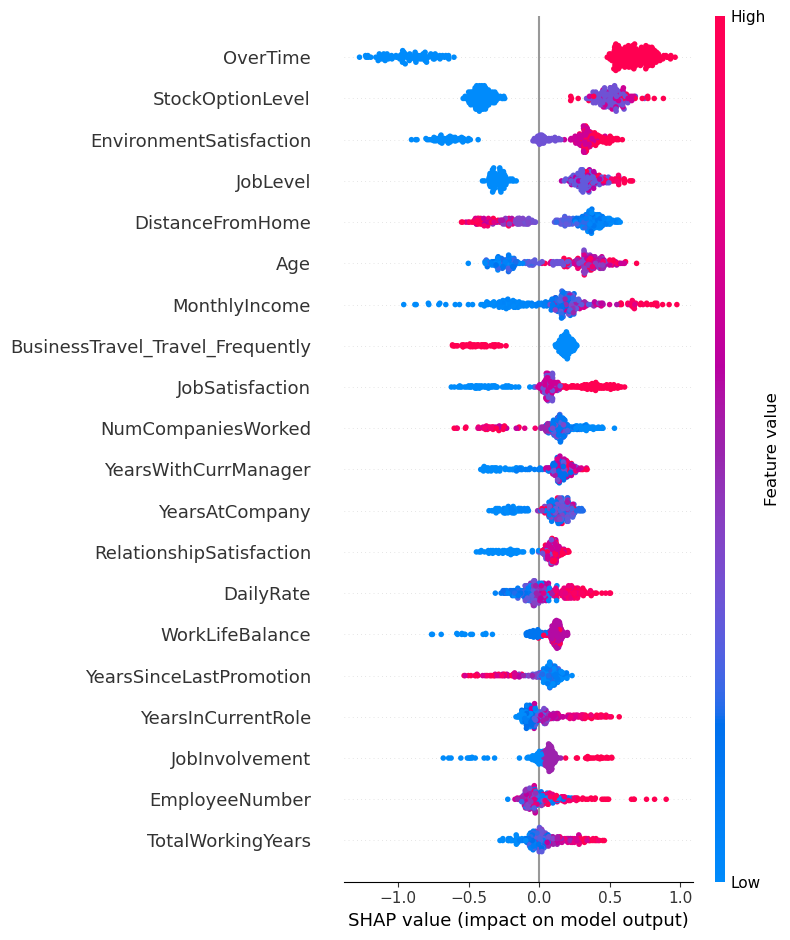

In [33]:
import shap

explainer = shap.TreeExplainer(cat)  # or cat
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

This plot ranks features by their overall influence on the model’s predictions for employee attrition. Each dot represents a single employee, and its horizontal position reflects how much that feature pushed the prediction toward attrition (positive SHAP value) or retention (negative SHAP value). The color gradient adds another layer: pink dots represent high feature values, while blue dots represent low values.
Key insights:
- OverTime is the most influential feature. High overtime (pink) consistently pushes predictions toward attrition, indicating burnout risk.
- StockOptionLevel and EnvironmentSatisfaction show that low values (blue) increase attrition risk, while high values (pink) promote retention.
- BusinessTravel_Travel_Frequently displays mixed behavior—its impact depends on context, suggesting it interacts with other features.
- Features like DistanceFromHome, JobLevel, and MonthlyIncome also contribute meaningfully, but their effects vary depending on value and interaccores.


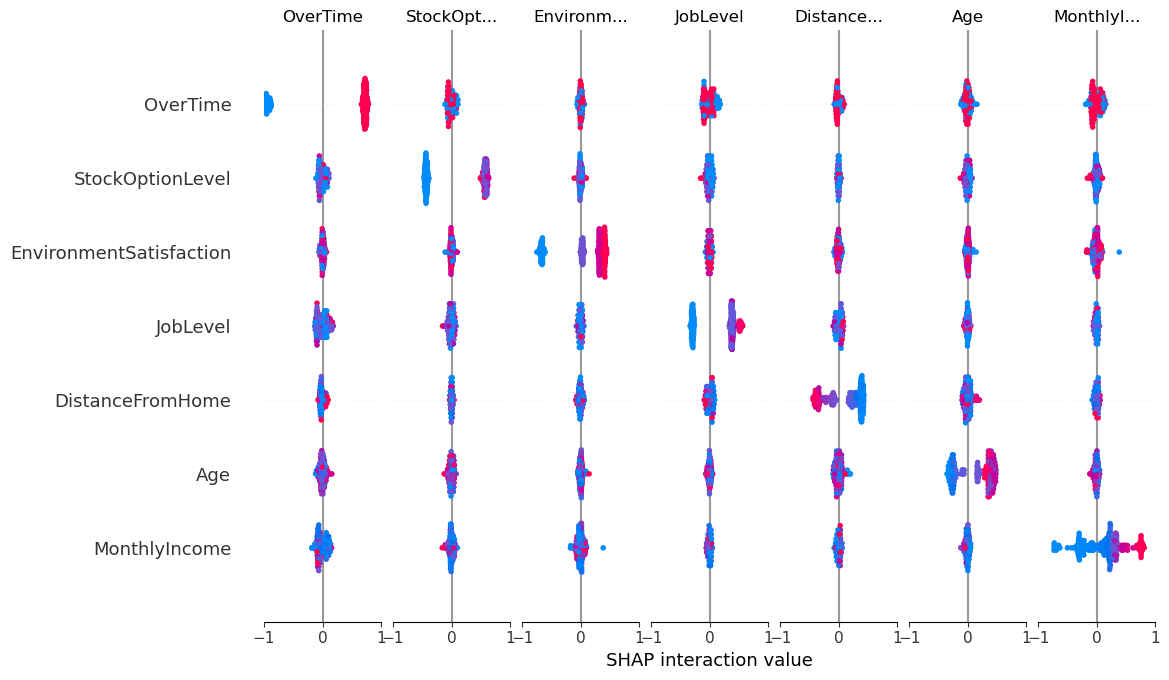

In [36]:
shap_interaction_values = explainer.shap_interaction_values(X_test)
shap.summary_plot(shap_interaction_values, X_test)

This plot dives deeper into how features interact with each other to influence predictions. Each subplot focuses on one primary feature and shows how its interaction with other features affects the model’s output. The x-axis shows the SHAP interaction value (combined impact), and the y-axis lists the interacting features. Dots are colored by the value of the interacting feature—pink for high, blue for low.
Key insights:
- OverTime interacts strongly with EnvironmentSatisfaction and JobLevel. High overtime combined with low satisfaction amplifies attrition risk.
- StockOptionLevel interacts with MonthlyIncome—low stock options and low income together push predictions toward attrition.
- DistanceFromHome shows that long commutes are more risky when paired with low job levels or younger age.
- These interactions reveal compound logic: no single feature causes attrition alone, but combinations can significantly shift risk


Now or final touches we are going to train our model with whole dataset instead of train_test_split

In [37]:
cat = CatBoostClassifier(
    scale_pos_weight = scale,
    eval_metric = 'Logloss'
)
cat.fit(X , y)

Learning rate set to 0.012144
0:	learn: 0.6883693	total: 22.7ms	remaining: 22.7s
1:	learn: 0.6830396	total: 27.2ms	remaining: 13.6s
2:	learn: 0.6778296	total: 31ms	remaining: 10.3s
3:	learn: 0.6734101	total: 35ms	remaining: 8.72s
4:	learn: 0.6687929	total: 39.3ms	remaining: 7.82s
5:	learn: 0.6644630	total: 42.5ms	remaining: 7.05s
6:	learn: 0.6605429	total: 47.7ms	remaining: 6.77s
7:	learn: 0.6564878	total: 52ms	remaining: 6.44s
8:	learn: 0.6534993	total: 55.7ms	remaining: 6.14s
9:	learn: 0.6495182	total: 60.1ms	remaining: 5.95s
10:	learn: 0.6453926	total: 63.6ms	remaining: 5.71s
11:	learn: 0.6421258	total: 68ms	remaining: 5.6s
12:	learn: 0.6380371	total: 72.6ms	remaining: 5.51s
13:	learn: 0.6339191	total: 77.1ms	remaining: 5.43s
14:	learn: 0.6300567	total: 80.9ms	remaining: 5.31s
15:	learn: 0.6264323	total: 85.2ms	remaining: 5.24s
16:	learn: 0.6228100	total: 89.4ms	remaining: 5.17s
17:	learn: 0.6191885	total: 93.8ms	remaining: 5.12s
18:	learn: 0.6155989	total: 97.6ms	remaining: 5.04s
1

In [38]:
import joblib

joblib.dump(cat, 'Employee_attrition_model.pkl')

['Employee_attrition_model.pkl']

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EmployeeCount                      1470 non-null   int64
 6   EmployeeNumber                     1470 non-null   int64
 7   EnvironmentSatisfaction            1470 non-null   int64
 8   Gender                             1470 non-null   int64
 9   HourlyRate                         1470 non-null   int64
 10  JobInvolvement                     1470 non-null   int64
 11  JobLevel                           1470 non-null   int64
 12  JobSatisfaction     